In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
# import stlearn as st
# import SpaGCN as spg


In [2]:
def intersect(lst1, lst2): 
    """
    获取并返回两个列表的交集
    Args:
        lst1: List
        lst2: List
    Returns:
        lst3: List of common elements.
    """
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3


def intersect_gene_list(lst):
    """
    获取并返回一个列表的多个anndata元素的共同基因
    Args:
        lst: List
    Returns:
        common_genes: List of common elements.
    """
    common_genes = lst[0].var.index
    for item in lst:
        common_genes = intersect(common_genes, item.var.index)
    return common_genes

In [3]:
def load_slices_fourST(data_dir='/home/hanyuji/Data/sxa_ST_data/breast_cancer_data/', slice_names=["slice1", "slice2", "slice3", "slice4"]):
    slices = []  
    for index, slice_name in enumerate(slice_names):
        slice_i = sc.read_csv(data_dir + slice_name + ".csv")
        slice_i_coor = np.genfromtxt(data_dir + slice_name + "_coor.csv", delimiter = ',')
        slice_i.obsm['spatial_coor'] = slice_i_coor
        slice_i.obs['slice'] = index+1.0
        # Preprocess slices
        sc.pp.filter_genes(slice_i, min_counts = 15)
        sc.pp.filter_cells(slice_i, min_counts = 100)
        slices.append(slice_i)
    adata_layer_1, adata_layer_2, adata_layer_3, adata_layer_4 = slices
    
    
    common_genes = intersect_gene_list((adata_layer_1, adata_layer_2, adata_layer_3, adata_layer_4))  # 筛选出共有的基因
    
    
    adata_layer_1 = adata_layer_1[:, common_genes]
    adata_layer_2 = adata_layer_2[:, common_genes]
    adata_layer_3 = adata_layer_3[:, common_genes]
    adata_layer_4 = adata_layer_4[:, common_genes]

    return [adata_layer_1, adata_layer_2, adata_layer_3, adata_layer_4]

In [4]:
# adata_layer_1, adata_layer_2, adata_layer_3, adata_layer_4 = load_slices_fourST()
adatas = load_slices_fourST()

In [5]:
for i in adatas:
    print(i)

View of AnnData object with n_obs × n_vars = 254 × 6397
    obs: 'slice', 'n_counts'
    var: 'n_counts'
    obsm: 'spatial_coor'
View of AnnData object with n_obs × n_vars = 250 × 6397
    obs: 'slice', 'n_counts'
    var: 'n_counts'
    obsm: 'spatial_coor'
View of AnnData object with n_obs × n_vars = 263 × 6397
    obs: 'slice', 'n_counts'
    var: 'n_counts'
    obsm: 'spatial_coor'
View of AnnData object with n_obs × n_vars = 262 × 6397
    obs: 'slice', 'n_counts'
    var: 'n_counts'
    obsm: 'spatial_coor'


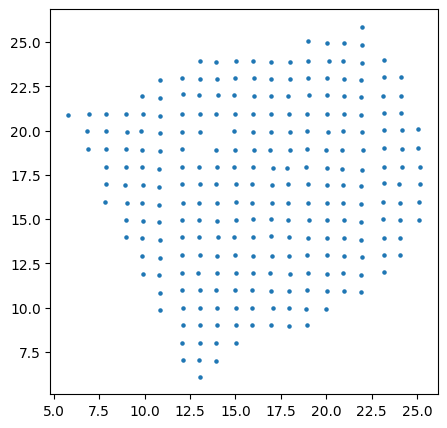

In [6]:
df = pd.DataFrame(adatas[0].obsm['spatial_coor'])

fig = plt.figure(figsize=(5, 5))

plt.scatter(df[0], df[1],s=5)

In [7]:
# 保存切片subset
combined_adata = ad.concat(
    adatas, 
    axis=0, 
    join='outer', 
    merge='unique', 
    uns_merge='unique', 
    label='batch', 
    keys=list(range(1, len(adatas)+1)), 
    index_unique='-', 
    fill_value=0
)
dataset_path = '/home/hanyuji/Data/sxa_ST_data/h5ad_BiGATAE/breast_cancer_4slices_254spot_6397gene.h5ad'
combined_adata.write(dataset_path)

In [8]:
combined_adata


AnnData object with n_obs × n_vars = 1029 × 6397
    obs: 'slice', 'n_counts', 'batch'
    obsm: 'spatial_coor'